In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nm

In [2]:
data=pd.read_csv("../input/used-car-dataset-ford-and-mercedes/audi.csv")

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Data Normalization 

In [8]:
data['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [9]:
data['year'].unique()

array([2017, 2016, 2019, 2015, 2014, 2018, 2013, 2020, 2004, 2009, 2012,
       2010, 2007, 2011, 2008, 2003, 2005, 2002, 2006, 1998, 1997])

In [10]:
data['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [11]:
data['transmission'].replace('Manual',1,inplace=True)

In [12]:
data['transmission']

0                1
1        Automatic
2                1
3        Automatic
4                1
           ...    
10663            1
10664            1
10665            1
10666    Automatic
10667            1
Name: transmission, Length: 10668, dtype: object

In [13]:
data['transmission'].replace('Automatic',2,inplace=True)
data['transmission'].replace('Semi-Auto',3,inplace=True)

In [14]:
data['transmission']

0        1
1        2
2        1
3        2
4        1
        ..
10663    1
10664    1
10665    1
10666    2
10667    1
Name: transmission, Length: 10668, dtype: int64

In [15]:
data['mileage'].unique()

array([15735, 36203, 29946, ...,  4018,  1978,  8646])

In [17]:
data['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [18]:
data['fuelType'].replace('Petrol',1,inplace=True)
data['fuelType'].replace('Diesel',2,inplace=True)
data['fuelType'].replace('Hybrid',3,inplace=True)
data['fuelType']

0        1
1        2
2        1
3        2
4        1
        ..
10663    1
10664    1
10665    1
10666    1
10667    1
Name: fuelType, Length: 10668, dtype: int64

In [19]:
data['tax'].unique()

array([150,  20,  30, 145, 125, 200,   0, 205, 160, 235, 260, 325, 300,
       165, 240, 565, 265, 135, 570, 555, 140, 330, 305, 155, 580, 290,
       195, 115, 295, 220, 230, 280, 315, 535, 190, 540, 515])

In [20]:
data['mpg'].unique()

array([ 55.4,  64.2,  67.3,  49.6,  58.9,  61.4,  70.6,  60.1,  57.6,
        52.3,  53.3,  56.5,  47.1,  47.9,  62.8,  76.3,  51.4,  65.7,
        68.9,  50.4,  72.4,  38.7,  74.3,  42.8,  83.1,  57.7,  54.3,
        40.4,  44.1,  33.2,  42.2,  44.8,  48.7,  37.7,  35.8,  40.9,
        45.6,  34. ,  29.4,  39.8,  39.2,  41.5,  38.2,  32.1,  30.7,
        34.9,  43.5,  36.2,  30.1,  32.8,  29.7,  26.4,  33.6,  34.5,
        46.3,  37.2,  80.7,  28.8,  31.7,  32.5,  31.4, 141.3,  31. ,
        35.3,  36.7, 117.7,  29.1,  21.4,  19.6,  26.9,  21.1,  76.4,
       156.9, 188.3,  24.1,  22.1,  21.6,  23. , 176.6,  22.8,  22.4,
        22.6,  24.8,  21.9,  38.1,  42.1,  50. ,  19.3,  28.5,  21. ,
        28.2,  30.4,  43.4,  37.6,  20.3,  30.8,  51.3,  27.4,  33.3,
        27.2,  34.4,  18.9,  25. ,  44.5])

In [21]:
data['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3])

## Data Visualisation 

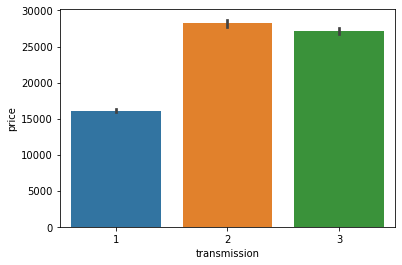

In [25]:
sns.barplot(x='transmission',y='price',data=data)

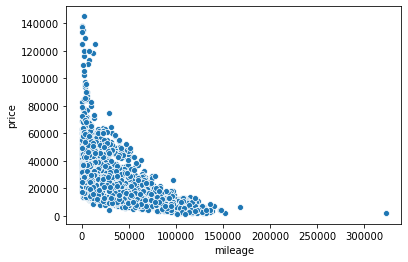

In [26]:
sns.scatterplot(x='mileage',y='price',data=data)

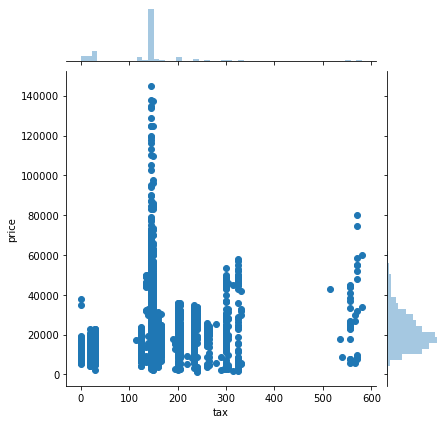

In [27]:
sns.jointplot(x='tax',y='price',data=data)

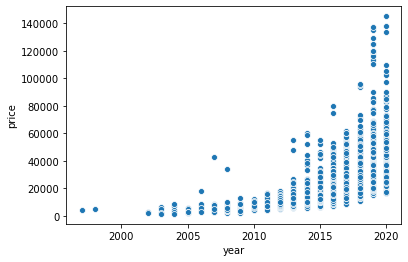

In [28]:
sns.scatterplot(x='year',y='price',data=data)

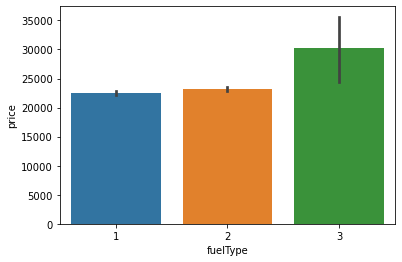

In [31]:
sns.barplot(x='fuelType',y='price',data=data)

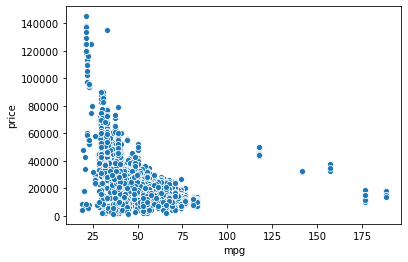

In [32]:
sns.scatterplot(x='mpg',y='price',data=data)

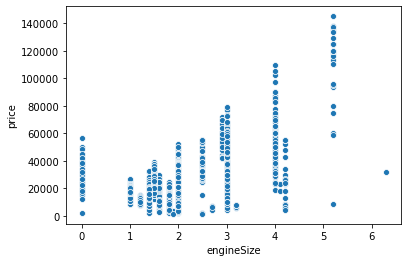

In [33]:
sns.scatterplot(x='engineSize',y='price',data=data)

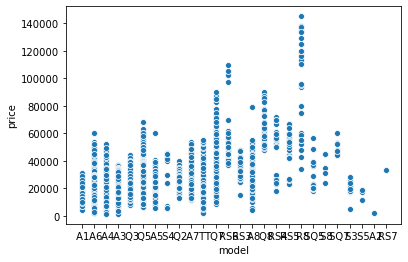

In [34]:
sns.scatterplot(x='model',y='price',data=data)

## Data Spliting 

In [35]:
data_x= data[['transmission','fuelType','tax','year','mileage','mpg']]
data_y= data['price']

In [36]:
data_x

,transmission,fuelType,tax,year,mileage,mpg
0,1,1,150,2017,15735,55.4
1,2,2,20,2016,36203,64.2
2,1,1,30,2016,29946,55.4
3,2,2,145,2017,25952,67.3
4,1,1,145,2019,1998,49.6
...,...,...,...,...,...,...
10663,1,1,145,2020,4018,49.6
10664,1,1,150,2020,1978,49.6
10665,1,1,150,2020,609,49.6
10666,2,1,150,2017,8646,47.9


In [37]:
data_y

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
10663    16999
10664    16999
10665    17199
10666    19499
10667    15999
Name: price, Length: 10668, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data_x, data_y, test_size=0.2, random_state=0)

In [42]:
x_train.shape, y_train.shape

((8534, 6), (8534,))

## Training the model 

In [43]:
from sklearn import svm
sv=svm.SVR()
sv.fit(x_train,y_train)

SVR()

In [44]:
yp=sv.predict(x_test)
yp

array([18633.76000041, 21298.79629452, 21478.19926199, ...,
       20656.69814808, 21443.89828994, 18905.35534455])

In [45]:
sv.score(x_test,y_test)

0.04082596092966406

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
ypp=tree.predict(x_test)
ypp

array([14498., 24950., 26000., ..., 42950., 30990.,  8499.])

In [51]:
tree.score(data_x,data_y)

0.9704436454463737